# Churn Model from Kaggle

## 1. Import data

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = (
    pd.read_csv('C:/Users/talentiluca/Documents/Bootcamp/3. Training/day05/data/Churn_Modelling.csv')
    .rename(columns=str.lower)
)

## 2. Data Set descriptions

In [69]:
data.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [70]:
data.shape

(10000, 14)

In [71]:
pd.DataFrame(data.columns)

,0
0,rownumber
1,customerid
2,surname
3,creditscore
4,geography
5,gender
6,age
7,tenure
8,balance
9,numofproducts


In [72]:
pd.DataFrame(data.dtypes)

,0
rownumber,int64
customerid,int64
surname,object
creditscore,int64
geography,object
gender,object
age,int64
tenure,int64
balance,float64
numofproducts,int64


## 3. Data Exploration

### 3.1 Exited

Target variable

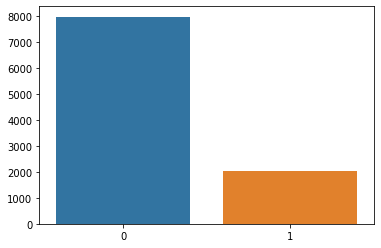

In [73]:
exited = data['exited'].value_counts()
sns.barplot(exited.index, exited.values)

In [74]:
exited_True = data['exited'][data['exited'] == 1]
print(exited_True.count())
print("Churn Percentage = "+str( (exited_True.shape[0] / data['exited'].shape[0]) * 100 ))

2037
Churn Percentage = 20.369999999999997


### 3.2 Missing Value

In [75]:
data.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

### 3.3 Customerid

In [76]:
data['customerid'].nunique()

10000

### 3.4 Check the unique values for all the variables

In [77]:
for item in data.columns:
    print(item)
    print(np.shape(data[item].unique()))

rownumber
(10000,)
customerid
(10000,)
surname
(2932,)
creditscore
(460,)
geography
(3,)
gender
(2,)
age
(70,)
tenure
(11,)
balance
(6382,)
numofproducts
(4,)
hascrcard
(2,)
isactivemember
(2,)
estimatedsalary
(9999,)
exited
(2,)


### 3.5 Categorical Cols
- Geography
- Gender

In [78]:
geography=(
    data.groupby('geography')
    .agg(
        num_cust=pd.NamedAgg(column='customerid', aggfunc="count"),
        num_churn=pd.NamedAgg(column='exited', aggfunc="sum")
    )
)
geography.assign(churn_percentage=geography['num_churn']/geography['num_cust'])

,num_cust,num_churn,churn_percentage
geography,,,
France,5014,810,0.161548
Germany,2509,814,0.324432
Spain,2477,413,0.166734


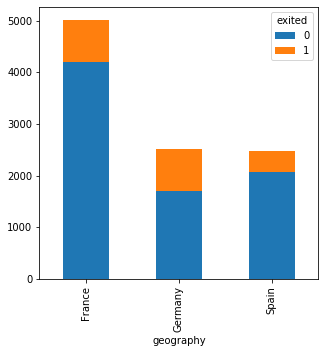

In [79]:
data.groupby(["geography", "exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

In [80]:
(
    data.groupby('gender')
    .agg(
        num_cust=pd.NamedAgg(column='customerid', aggfunc="count")
    )
)

,num_cust
gender,
Female,4543
Male,5457


In [81]:
gender=(
    data.groupby('gender')
    .agg(
        num_cust=pd.NamedAgg(column='customerid', aggfunc="count"),
        num_churn=pd.NamedAgg(column='exited', aggfunc="sum")
    )
)
gender.assign(churn_percentage=gender['num_churn']/gender['num_cust'])

,num_cust,num_churn,churn_percentage
gender,,,
Female,4543,1139,0.250715
Male,5457,898,0.164559


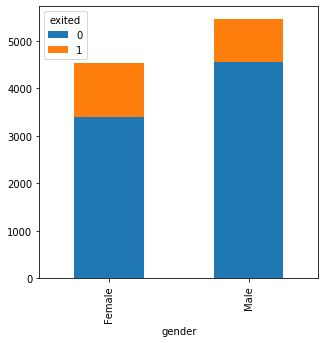

In [82]:
data.groupby(["gender", "exited"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### 3.6 Creditscore

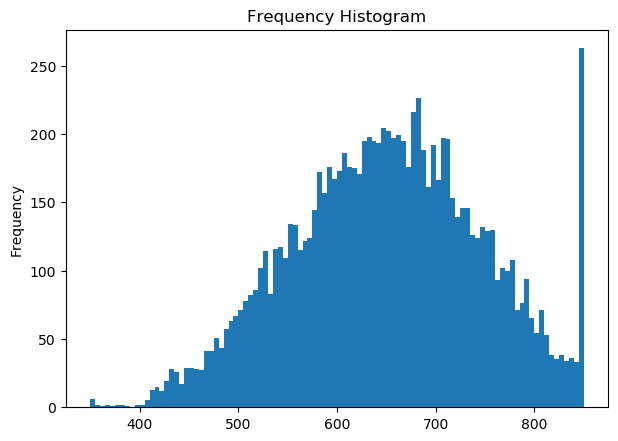

In [83]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

x = data['creditscore']
plt.hist(x, bins=100)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

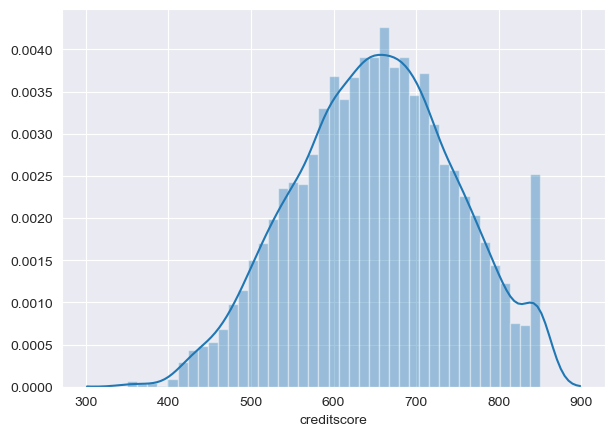

In [84]:
sns.set_style('darkgrid')
sns.distplot(data['creditscore'])

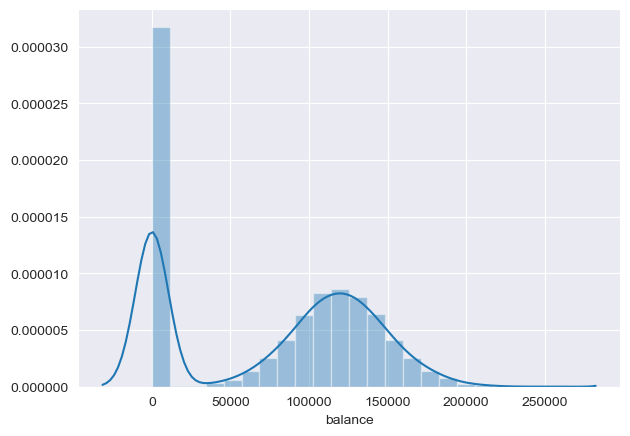

In [85]:
sns.set_style('darkgrid')
sns.distplot(data['balance'])

In [86]:
data['balance'][data['balance'] == 0].count()

3617

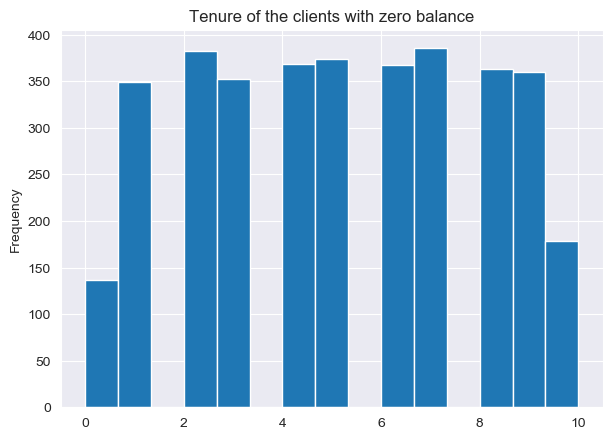

In [87]:
tenure_balance_zero = data[data['balance'] == 0]

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

x = tenure_balance_zero['tenure']
plt.hist(x, bins=15)
plt.gca().set(title='Tenure of the clients with zero balance', ylabel='Frequency');

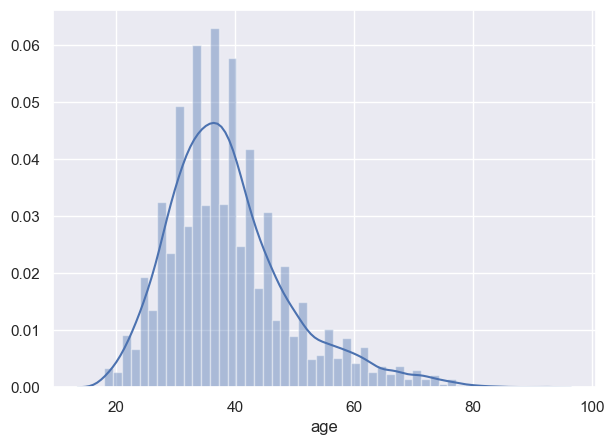

In [112]:
sns.set_style('darkgrid')
sns.distplot(data['age'])

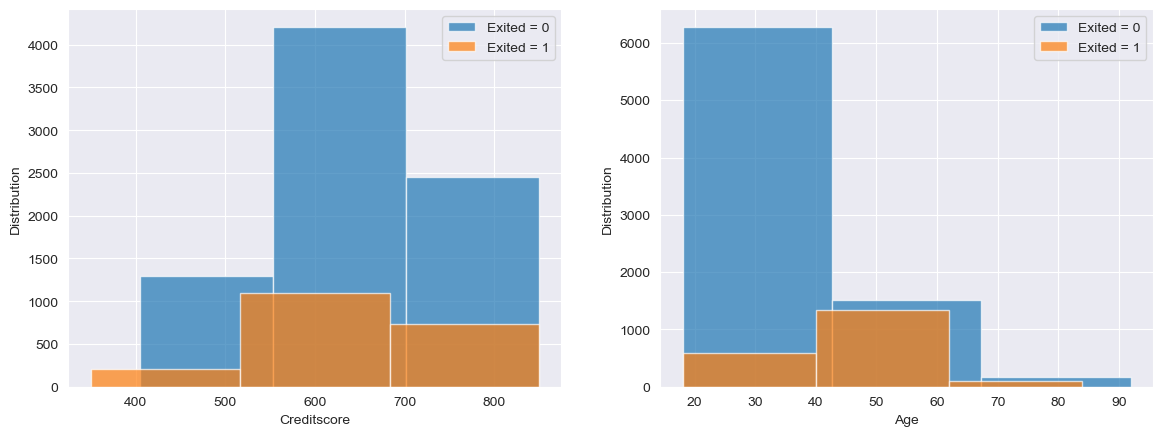

In [88]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(data['creditscore'][data['exited'] == 0], bins=3, alpha = 0.7, label = 'Exited = 0')
plt.hist(data['creditscore'][data['exited'] == 1], bins=3, alpha = 0.7, label = 'Exited = 1')
plt.ylabel('Distribution')
plt.xlabel('Creditscore')
plt.legend()

plt.subplot(1,2,2)
plt.hist(data['age'][data['exited'] == 0], bins=3, alpha = 0.7, label = 'Exited = 0')
plt.hist(data['age'][data['exited'] == 1], bins=3, alpha = 0.7, label = 'Exited = 1')
plt.ylabel('Distribution')
plt.xlabel('Age')
plt.legend()

plt.show()

### 3.7 Variable distributions

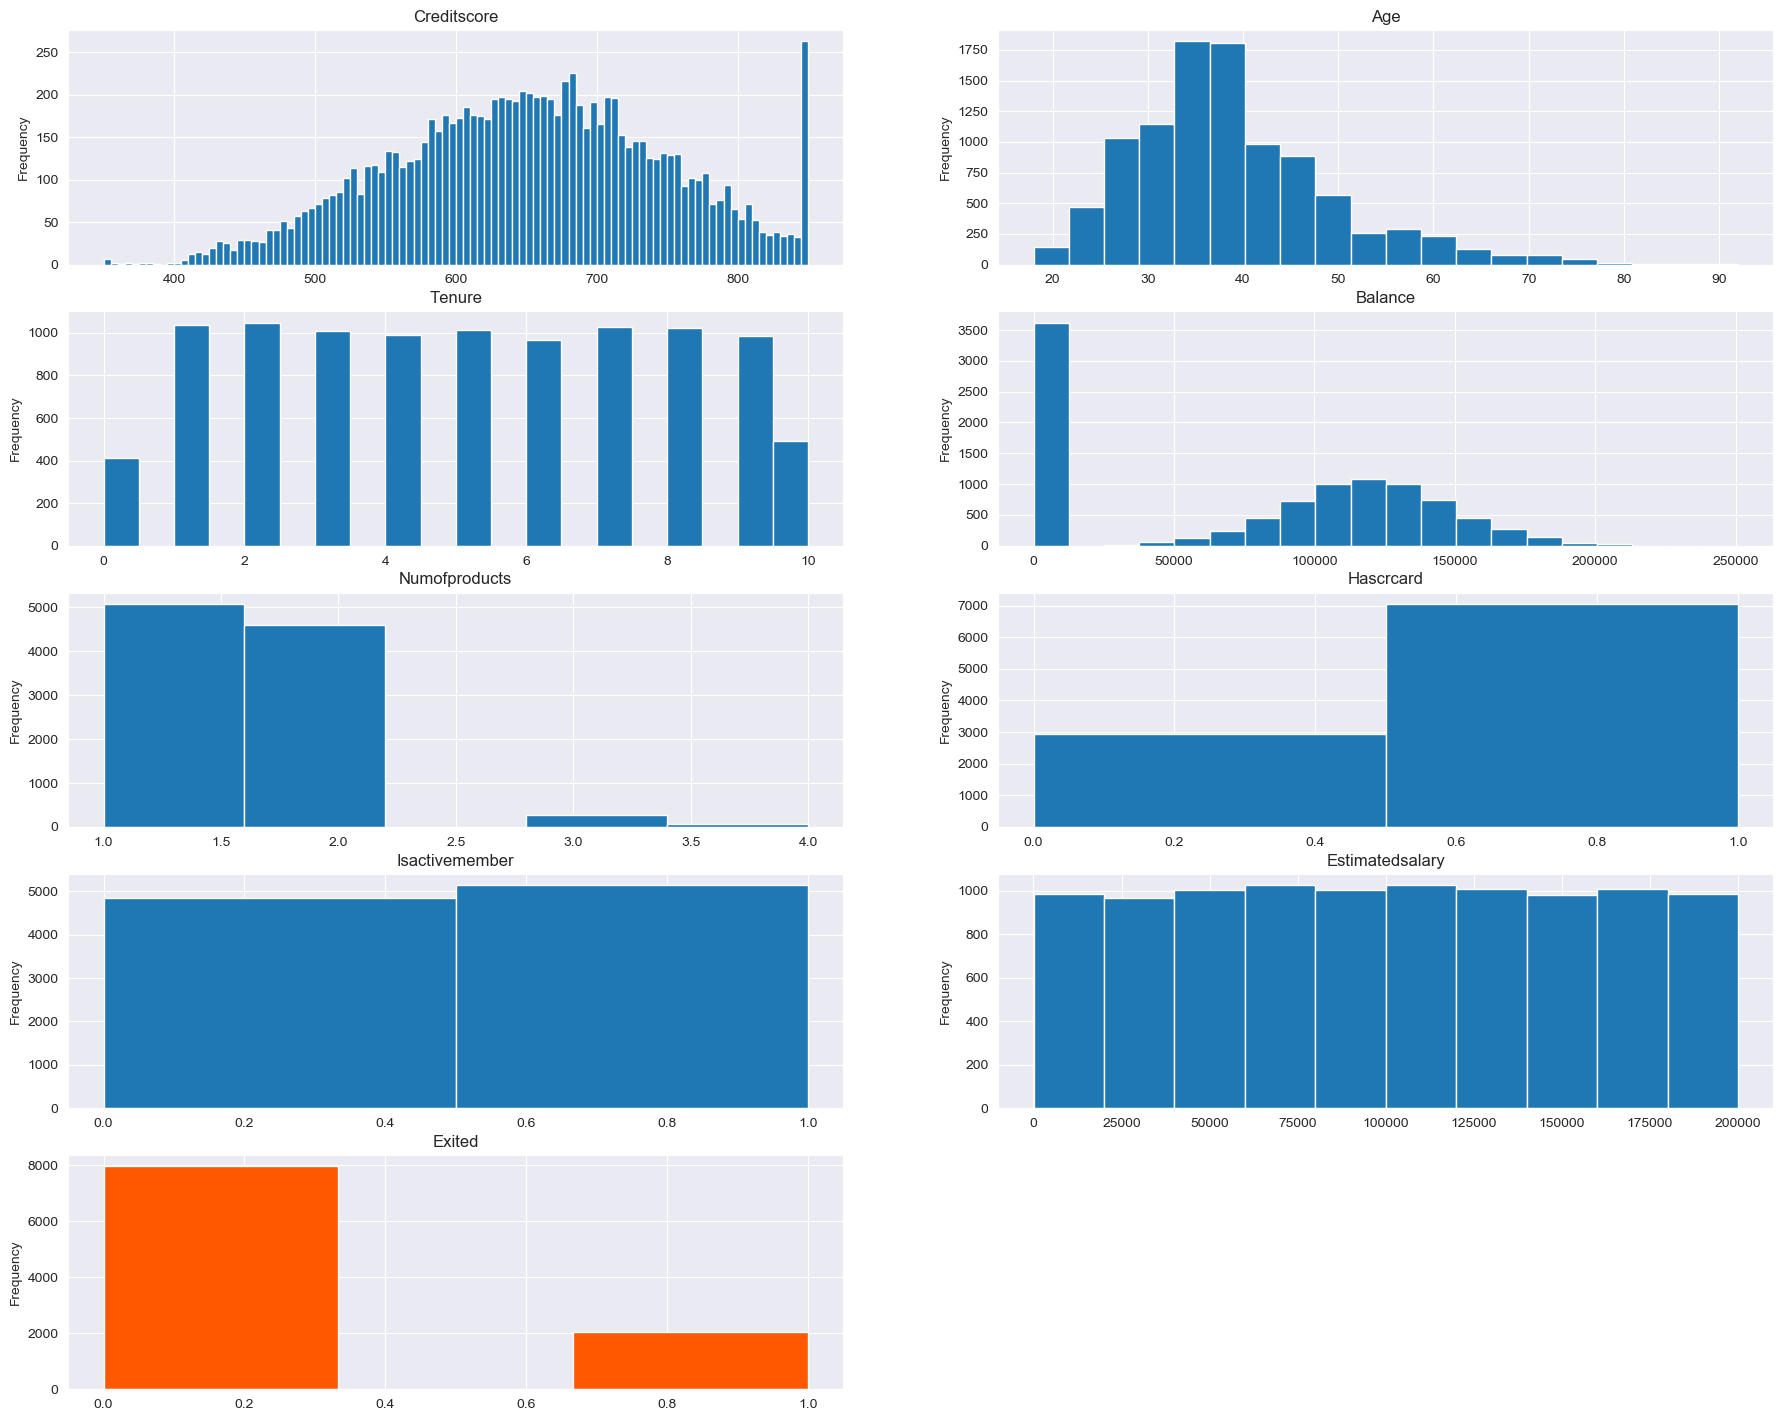

In [89]:
gridsize = (5, 2)
plt.figure(figsize=(22, 18))
ax_00 = plt.subplot2grid(gridsize, (0, 0))
ax_01 = plt.subplot2grid(gridsize, (0, 1))
ax_10 = plt.subplot2grid(gridsize, (1, 0))
ax_11 = plt.subplot2grid(gridsize, (1, 1))
ax_20 = plt.subplot2grid(gridsize, (2, 0))
ax_21 = plt.subplot2grid(gridsize, (2, 1))
ax_30 = plt.subplot2grid(gridsize, (3, 0))
ax_31 = plt.subplot2grid(gridsize, (3, 1))
ax_40 = plt.subplot2grid(gridsize, (4, 0))

ax_00.hist(data['creditscore'], bins=100)
ax_00.set(title='Creditscore', ylabel='Frequency');

ax_01.hist(data['age'], bins=20)
ax_01.set(title='Age', ylabel='Frequency');

ax_10.hist(data['tenure'], bins=20)
ax_10.set(title='Tenure', ylabel='Frequency');

ax_11.hist(data['balance'], bins=20)
ax_11.set(title='Balance', ylabel='Frequency');

ax_20.hist(data['numofproducts'], bins=5)
ax_20.set(title='Numofproducts', ylabel='Frequency');

ax_21.hist(data['hascrcard'], bins=2)
ax_21.set(title='Hascrcard', ylabel='Frequency');

ax_30.hist(data['isactivemember'], bins=2)
ax_30.set(title='Isactivemember', ylabel='Frequency');

ax_31.hist(data['estimatedsalary'], bins=10)
ax_31.set(title='Estimatedsalary', ylabel='Frequency');

ax_40.hist(data['exited'], bins=3, color='#ff5800')
ax_40.set(title='Exited', ylabel='Frequency');

<Figure size 2200x1800 with 0 Axes>

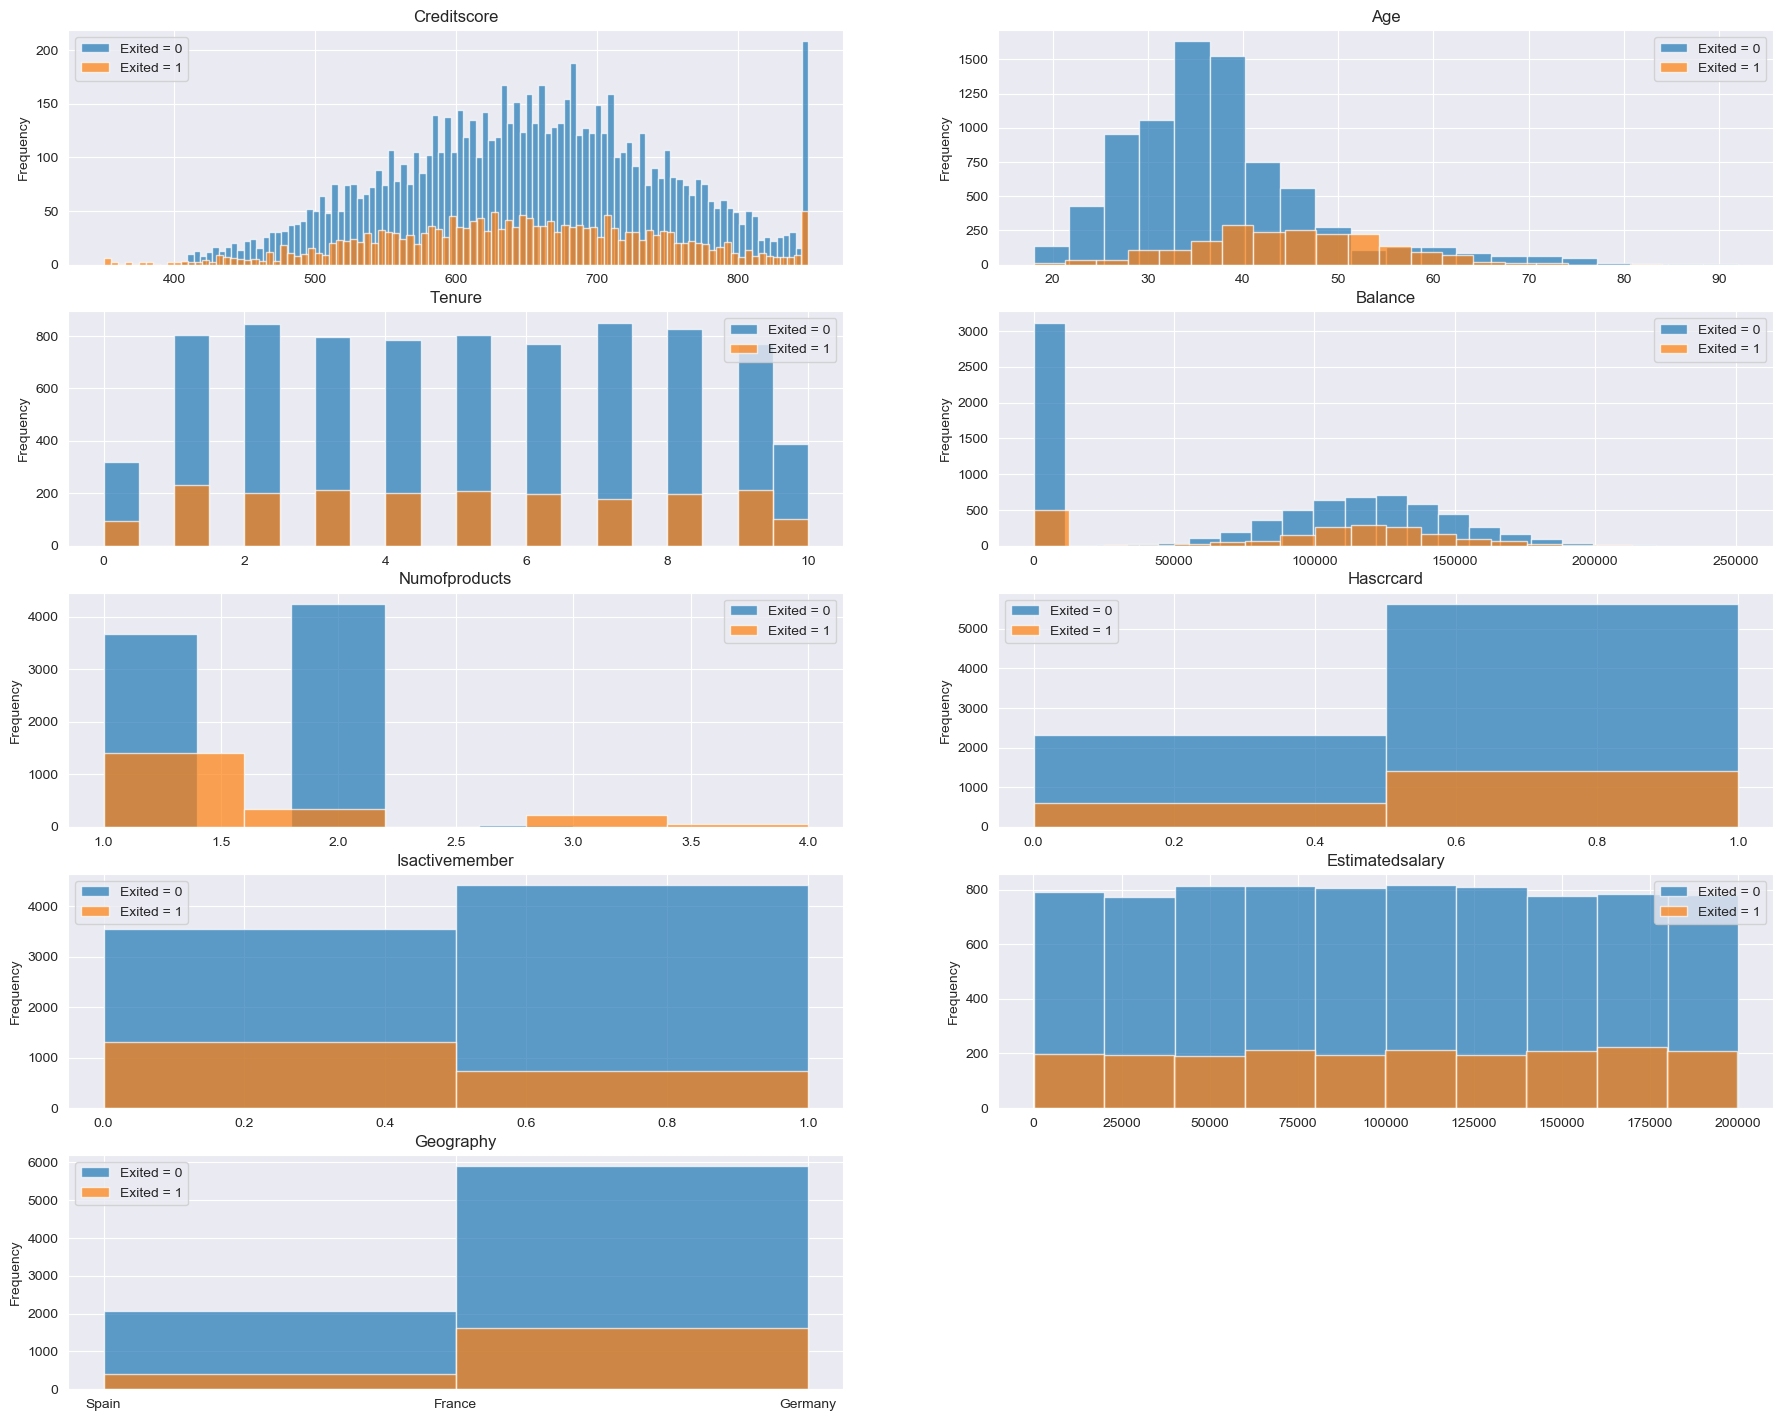

In [90]:
gridsize = (5, 2)
plt.figure(figsize=(22, 18))

gridsize = (5, 2)
fig = plt.figure(figsize=(22, 18))
ax_00 = plt.subplot2grid(gridsize, (0, 0))
ax_01 = plt.subplot2grid(gridsize, (0, 1))
ax_10 = plt.subplot2grid(gridsize, (1, 0))
ax_11 = plt.subplot2grid(gridsize, (1, 1))
ax_20 = plt.subplot2grid(gridsize, (2, 0))
ax_21 = plt.subplot2grid(gridsize, (2, 1))
ax_30 = plt.subplot2grid(gridsize, (3, 0))
ax_31 = plt.subplot2grid(gridsize, (3, 1))
ax_40 = plt.subplot2grid(gridsize, (4, 0))

ax_00.hist(data['creditscore'][data['exited'] == 0], bins=100, alpha = 0.7, label = 'Exited = 0')
ax_00.hist(data['creditscore'][data['exited'] == 1], bins=100, alpha = 0.7, label = 'Exited = 1')
ax_00.set(title='Creditscore', ylabel='Frequency');
ax_00.legend()

ax_01.hist(data['age'][data['exited'] == 0], bins=20, alpha = 0.7, label = 'Exited = 0')
ax_01.hist(data['age'][data['exited'] == 1], bins=20, alpha = 0.7, label = 'Exited = 1')
ax_01.set(title='Age', ylabel='Frequency');
ax_01.legend()

ax_10.hist(data['tenure'][data['exited'] == 0], bins=20, alpha = 0.7, label = 'Exited = 0')
ax_10.hist(data['tenure'][data['exited'] == 1], bins=20, alpha = 0.7, label = 'Exited = 1')
ax_10.set(title='Tenure', ylabel='Frequency');
ax_10.legend()

ax_11.hist(data['balance'][data['exited'] == 0], bins=20, alpha = 0.7, label = 'Exited = 0')
ax_11.hist(data['balance'][data['exited'] == 1], bins=20, alpha = 0.7, label = 'Exited = 1')
ax_11.set(title='Balance', ylabel='Frequency');
ax_11.legend()

ax_20.hist(data['numofproducts'][data['exited'] == 0], bins=5, alpha = 0.7, label = 'Exited = 0')
ax_20.hist(data['numofproducts'][data['exited'] == 1], bins=5, alpha = 0.7, label = 'Exited = 1')
ax_20.set(title='Numofproducts', ylabel='Frequency');
ax_20.legend()

ax_21.hist(data['hascrcard'][data['exited'] == 0], bins=2, alpha = 0.7, label = 'Exited = 0')
ax_21.hist(data['hascrcard'][data['exited'] == 1], bins=2, alpha = 0.7, label = 'Exited = 1')
ax_21.set(title='Hascrcard', ylabel='Frequency');
ax_21.legend()

ax_30.hist(data['isactivemember'][data['exited'] == 0], bins=2, alpha = 0.7, label = 'Exited = 0')
ax_30.hist(data['isactivemember'][data['exited'] == 1], bins=2, alpha = 0.7, label = 'Exited = 1')
ax_30.set(title='Isactivemember', ylabel='Frequency');
ax_30.legend()

ax_31.hist(data['estimatedsalary'][data['exited'] == 0], bins=10, alpha = 0.7, label = 'Exited = 0')
ax_31.hist(data['estimatedsalary'][data['exited'] == 1], bins=10, alpha = 0.7, label = 'Exited = 1')
ax_31.set(title='Estimatedsalary', ylabel='Frequency');
ax_31.legend()

ax_40.hist(data['geography'][data['exited'] == 0], bins=2, alpha = 0.7, label = 'Exited = 0')
ax_40.hist(data['geography'][data['exited'] == 1], bins=2, alpha = 0.7, label = 'Exited = 1')
ax_40.set(title='Geography', ylabel='Frequency');
ax_40.legend()

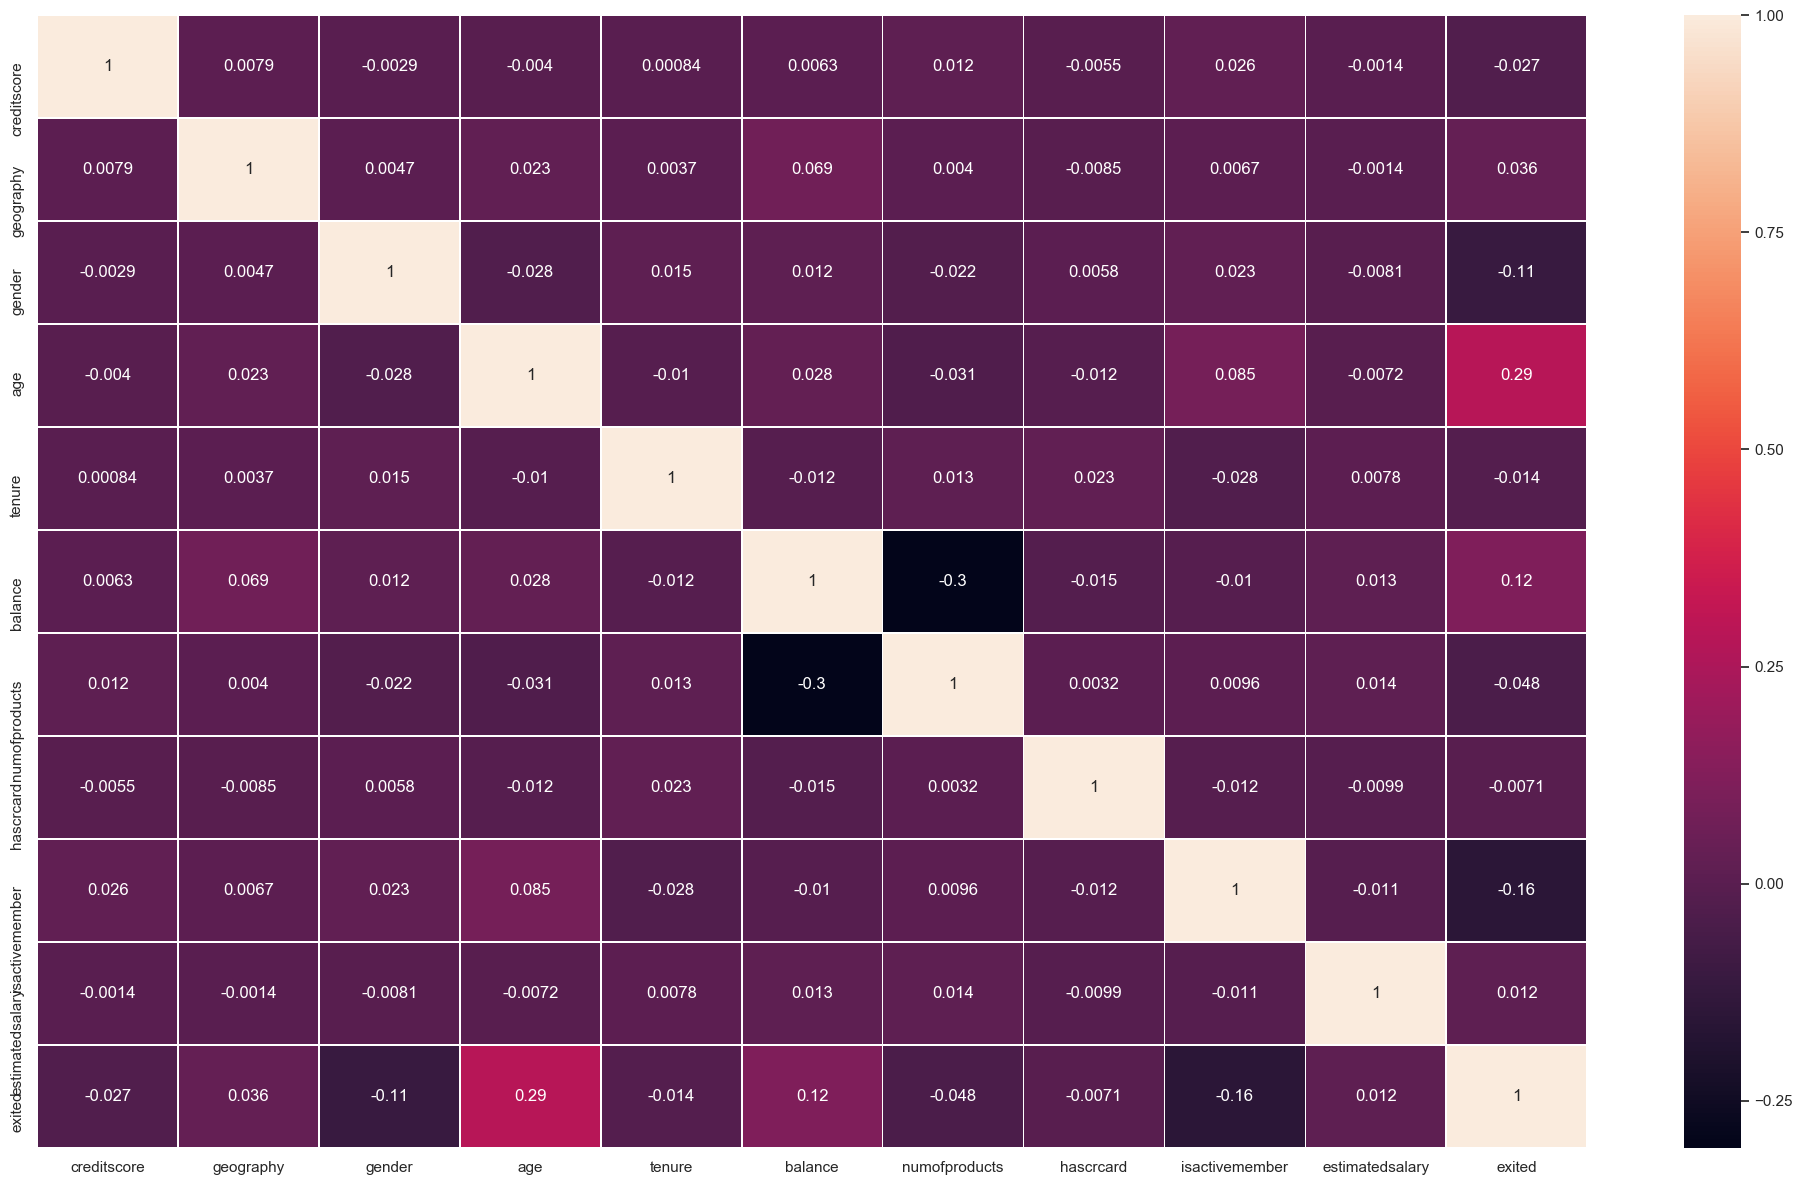

In [185]:
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (25,15))
    corr = dataframe.corr()
    if show_chart == True:
        ax= sns.heatmap(
                        corr, 
                        xticklabels=corr.columns.values,
                        yticklabels=corr.columns.values,
                        annot=True,
                        linewidths=.5
                        )
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
    return corr

correlation_df = show_correlations(data,show_chart=True)

In [92]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
rownumber,1,0.0042,0.0058,0.00078,-0.0065,-0.0091,0.0072,0.0006,0.012,-0.006,-0.017
customerid,0.0042,1,0.0053,0.0095,-0.015,-0.012,0.017,-0.014,0.0017,0.015,-0.0062
creditscore,0.0058,0.0053,1,-0.004,0.00084,0.0063,0.012,-0.0055,0.026,-0.0014,-0.027
age,0.00078,0.0095,-0.004,1,-0.01,0.028,-0.031,-0.012,0.085,-0.0072,0.29
tenure,-0.0065,-0.015,0.00084,-0.01,1,-0.012,0.013,0.023,-0.028,0.0078,-0.014
balance,-0.0091,-0.012,0.0063,0.028,-0.012,1,-0.3,-0.015,-0.01,0.013,0.12
numofproducts,0.0072,0.017,0.012,-0.031,0.013,-0.3,1,0.0032,0.0096,0.014,-0.048
hascrcard,0.0006,-0.014,-0.0055,-0.012,0.023,-0.015,0.0032,1,-0.012,-0.0099,-0.0071
isactivemember,0.012,0.0017,0.026,0.085,-0.028,-0.01,0.0096,-0.012,1,-0.011,-0.16
estimatedsalary,-0.006,0.015,-0.0014,-0.0072,0.0078,0.013,0.014,-0.0099,-0.011,1,0.012


C:\Users\talentiluca\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\talentiluca\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


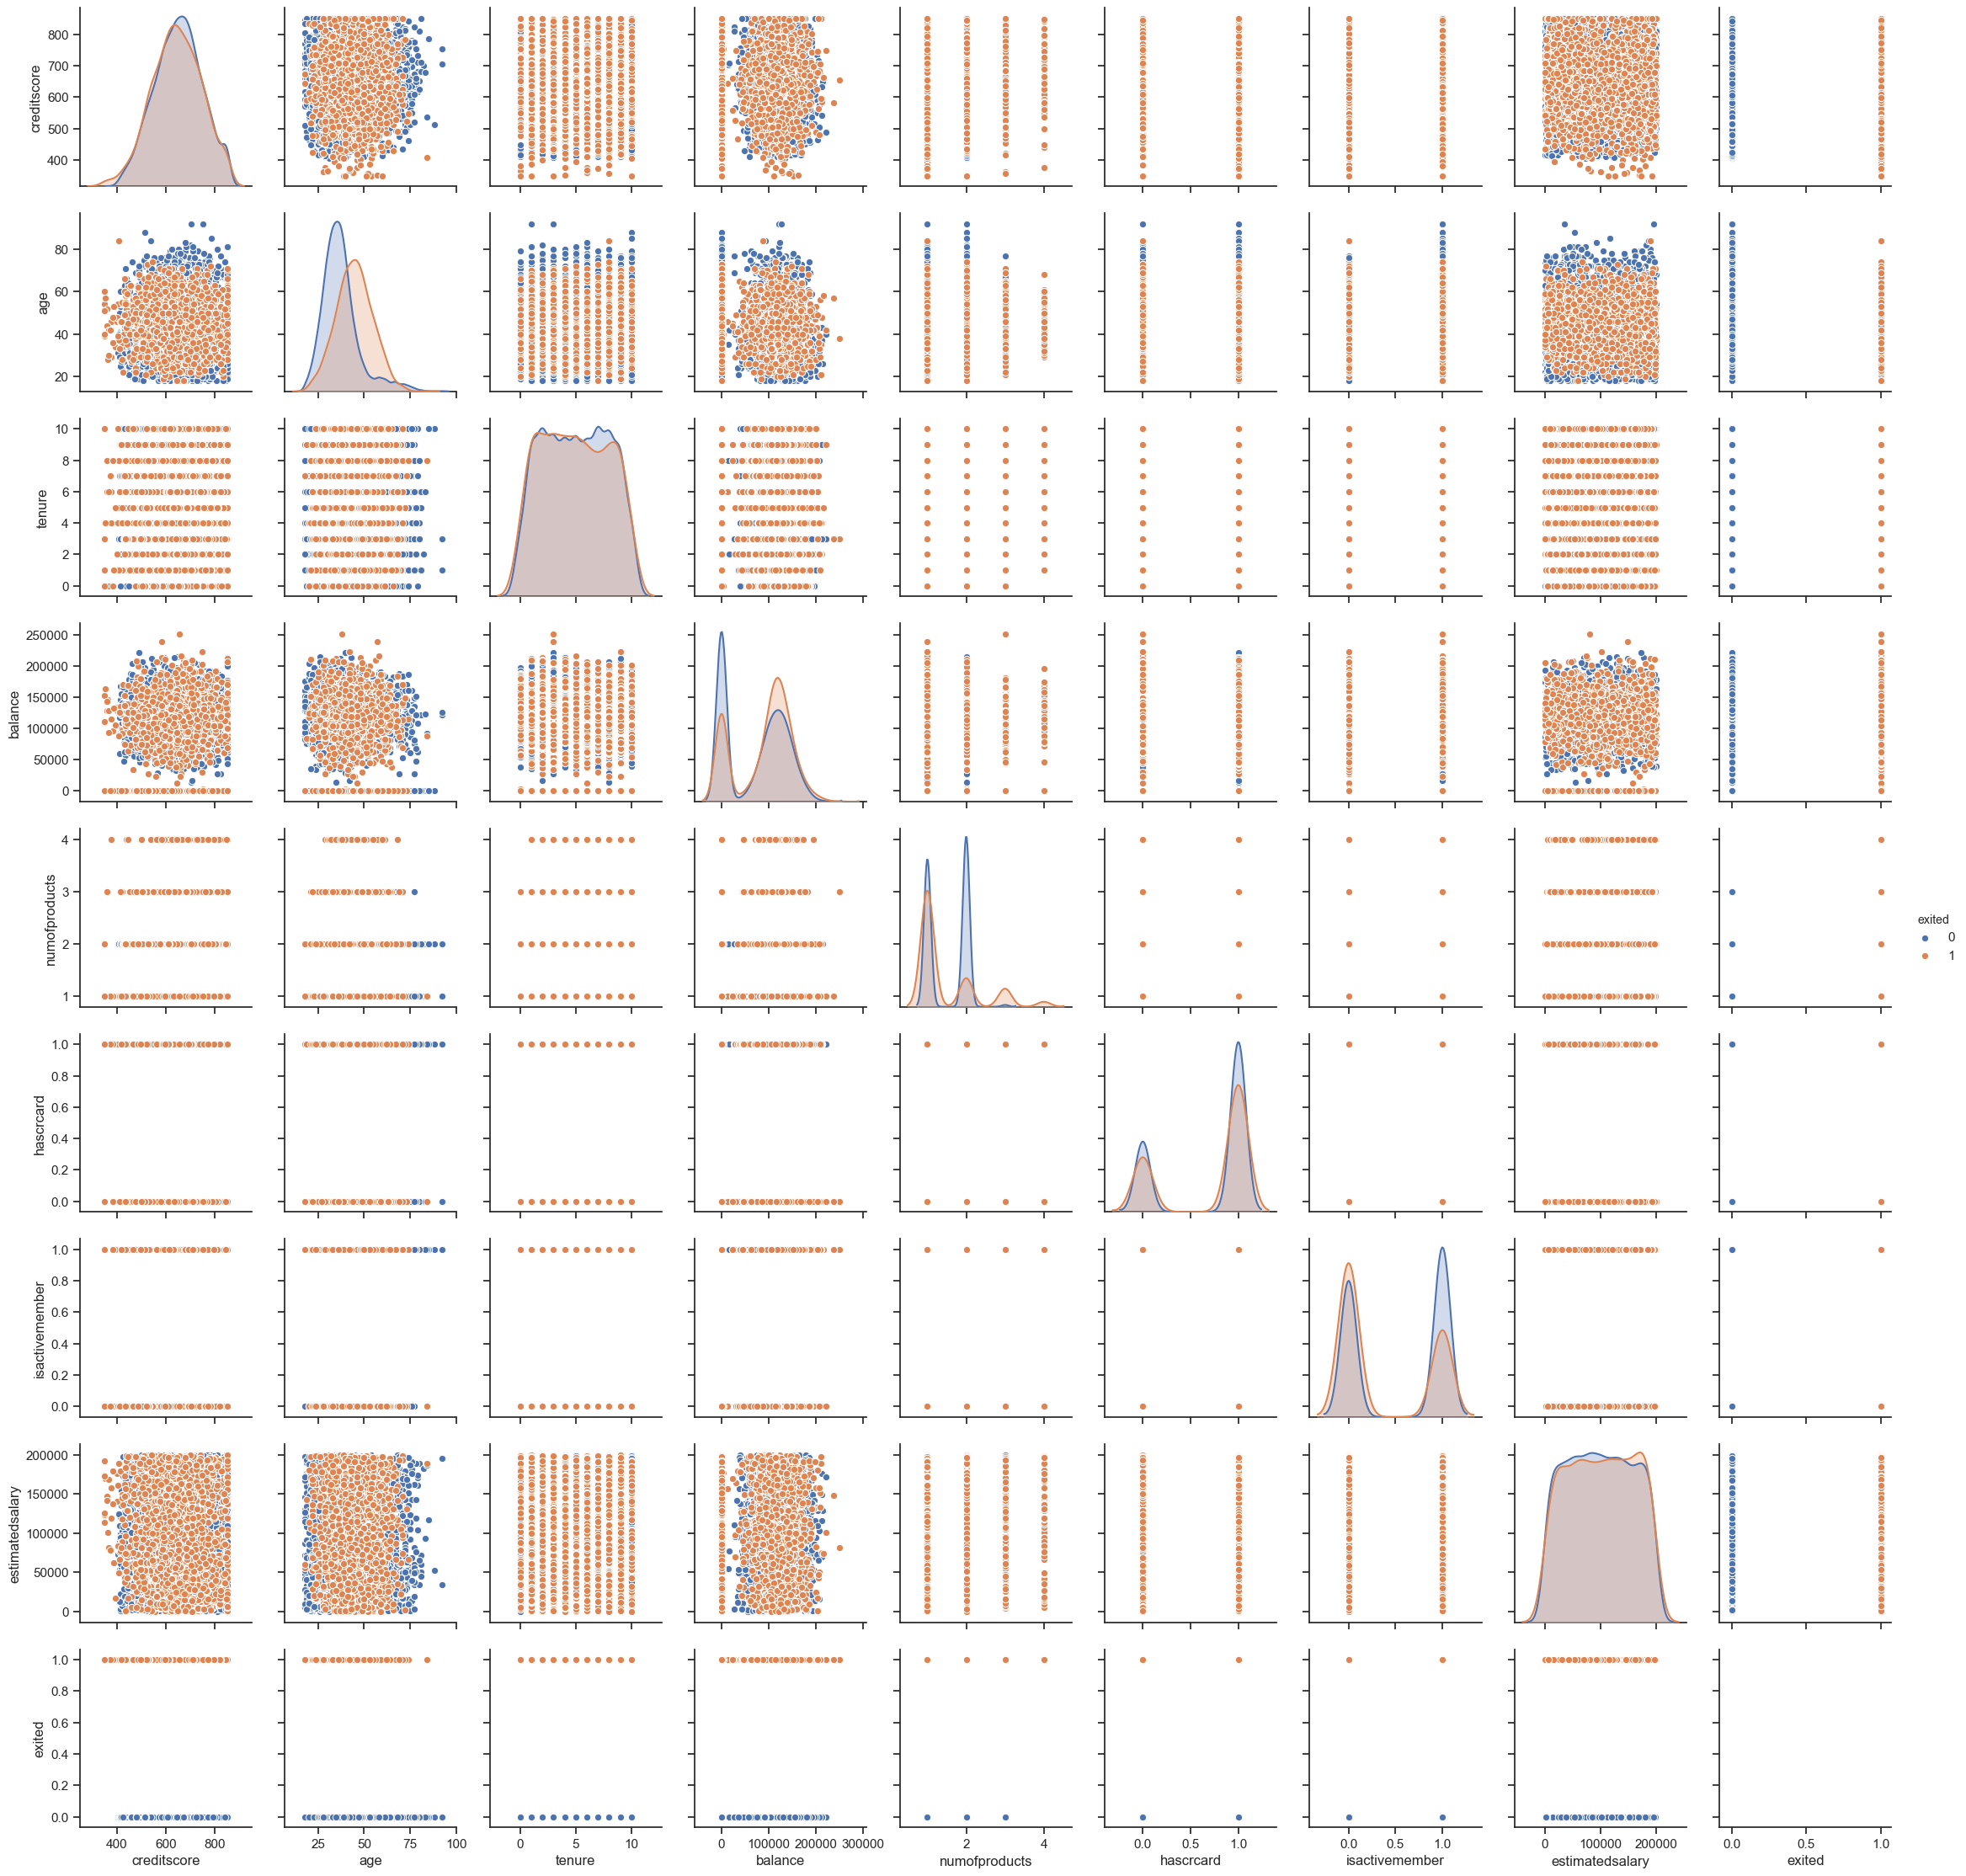

In [93]:
sns.set(style="ticks")

sns.pairplot(data[['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember',
                   'estimatedsalary', 'exited']], hue="exited")

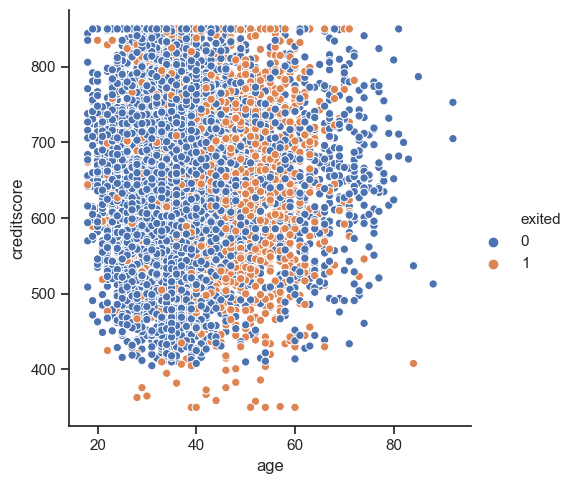

In [94]:
sns.relplot(x="age", y="creditscore", hue="exited", data=data);

## 4. Model phase

In [4]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics

### 4.1 Drop variables

Maybe the following variables are not important: rownumber, customerid, surname

In [5]:
data.drop(['rownumber', 'customerid', 'surname'], axis = 1, inplace=True)

In [6]:
data.shape

(10000, 11)

In [7]:
data.head(5)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 4.2 Handle Categorical Cols
- Geography
- Gender

Try Label Encode but maybe is better to use OneHotencoder

label_encoder = preprocessing.LabelEncoder()

data['geography'] = label_encoder.fit_transform(data['geography'])
data['gender'] = label_encoder.fit_transform(data['gender'])

print (data.dtypes)

data.groupby('gender').count()

data.groupby('geography').count()

### ------> Try OneHotEncore to binarize Geography in 3 variables and Gender in 2 variables

from sklearn.preprocessing import OneHotEncoder

geo=pd.DataFrame(OneHotEncoder(sparse=False).fit_transform(data[['geography']]))
geo

gender=pd.DataFrame(OneHotEncoder(sparse=False).fit_transform(data[['gender']]))
gender

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
 
feature = ColumnTransformer([
    ("numeric", StandardScaler(), ['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']),
    ("categorical", OneHotEncoder(sparse=False), ['Geography','Gender']),
#     ("remainder",'passthrough')
], remainder='passthrough')
 
pipe = Pipeline([
    ("feature", feature),
    ("classifier", LogisticRegression())
])
 
#Remove the target variable from X and make Y = target variable
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
 
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder # LabelEncoder <- maybe can halp to adress better the name of the variables

feature = ColumnTransformer(
     [("numeric", StandardScaler(), ['creditscore', 'balance', 'estimatedsalary']),
      ("categorical", OneHotEncoder(sparse=False), ['geography', 'gender'])
     ], remainder='passthrough'
)

pipe = Pipeline([
    ("feature", feature),
])

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder # LabelEncoder <- maybe can halp to adress better the name of the variables
from sklearn.pipeline import Pipeline

feature = ColumnTransformer(
     [("numeric", StandardScaler(), ['creditscore', 'balance', 'estimatedsalary']),
      ("categorical", OneHotEncoder(sparse=False), ['geography', 'gender'])
     ]
)

In [9]:
data_transf=pd.DataFrame(feature.fit_transform(data))

In [10]:
data

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
data_transf

,0,1,2,3,4,5,6,7
0,-0.326221,-1.225848,0.021886,1.0,0.0,0.0,1.0,0.0
1,-0.440036,0.117350,0.216534,0.0,0.0,1.0,1.0,0.0
2,-1.536794,1.333053,0.240687,1.0,0.0,0.0,1.0,0.0
3,0.501521,-1.225848,-0.108918,1.0,0.0,0.0,1.0,0.0
4,2.063884,0.785728,-0.365276,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
9995,1.246488,-1.225848,-0.066419,1.0,0.0,0.0,0.0,1.0
9996,-1.391939,-0.306379,0.027988,1.0,0.0,0.0,0.0,1.0
9997,0.604988,-1.225848,-1.008643,1.0,0.0,0.0,1.0,0.0
9998,1.256835,-0.022608,-0.125231,0.0,1.0,0.0,0.0,1.0


In [17]:
data_transf=data_transf.rename(index=str, columns={0:'std_creditscore',
                                                   1:'std_balance',
                                                   2:'std_estimatedsalary',
                                                   3:'flag_france',
                                                   4:'flag_germany',
                                                   5:'flag_spain',
                                                   6:'flag_female',
                                                   7:'flag_male'})

In [18]:
data=data.assign(index=range(10000))

In [19]:
data_transf=data_transf.assign(index=range(10000))

In [20]:
data_new = pd.merge(data, data_transf, on='index', how='inner')

In [21]:
data_new.drop(['creditscore', 'balance', 'estimatedsalary', 'geography', 'gender', 'index'], axis = 1, inplace=True)
data_new

,age,tenure,numofproducts,hascrcard,isactivemember,exited,creditscore_std,balance_std,estimatedsalary_std,france_flag,germany_flag,spain_flag,female_flag,male_flag
0,42,2,1,1,1,1,-0.326221,-1.225848,0.021886,1.0,0.0,0.0,1.0,0.0
1,41,1,1,0,1,0,-0.440036,0.117350,0.216534,0.0,0.0,1.0,1.0,0.0
2,42,8,3,1,0,1,-1.536794,1.333053,0.240687,1.0,0.0,0.0,1.0,0.0
3,39,1,2,0,0,0,0.501521,-1.225848,-0.108918,1.0,0.0,0.0,1.0,0.0
4,43,2,1,1,1,0,2.063884,0.785728,-0.365276,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39,5,2,1,0,0,1.246488,-1.225848,-0.066419,1.0,0.0,0.0,0.0,1.0
9996,35,10,1,1,1,0,-1.391939,-0.306379,0.027988,1.0,0.0,0.0,0.0,1.0
9997,36,7,1,0,1,1,0.604988,-1.225848,-1.008643,1.0,0.0,0.0,1.0,0.0
9998,42,3,2,1,0,1,1.256835,-0.022608,-0.125231,0.0,1.0,0.0,0.0,1.0


### 4.3 Strip of Response values

In [23]:
y = data_new['exited'].values
y.size

10000

### 4.4 Build Feature Matrix

In [24]:
X = data_new.drop('exited', 1).values

In [25]:
X

array([[42.,  2.,  1., ...,  0.,  1.,  0.],
       [41.,  1.,  1., ...,  1.,  1.,  0.],
       [42.,  8.,  3., ...,  0.,  1.,  0.],
       ...,
       [36.,  7.,  1., ...,  0.,  1.,  0.],
       [42.,  3.,  2., ...,  0.,  0.,  1.],
       [28.,  4.,  1., ...,  0.,  1.,  0.]])

In [26]:
X.shape

(10000, 13)

### 4.5 Standardize Feature Matrix values

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

X

### 4.6 Stratified K-fold Cross Validation

In [27]:
def stratified_cv(X, y, clf_class, shuffle=True, n_splits=30, **kwargs):
    stratified_k_fold = model_selection.StratifiedKFold(n_splits=n_splits, shuffle=True)
    y_pred = y.copy()
    for train_index, test_index in stratified_k_fold.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

### 4.7 Build Models and Train

In [28]:
print('Gradient Boosting Classifier:  {:.2f}'
      .format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):   {:.2f}'
      .format(metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC, gamma='scale'))))
print('Random Forest Classifier:      {:.2f}'
      .format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier, n_estimators=20))))
print('K Nearest Neighbor Classifier: {:.2f}'
      .format(metrics.accuracy_score(y, stratified_cv(X, y, neighbors.KNeighborsClassifier, n_jobs=-1))))
print('Logistic Regression:           {:.2f}'
      .format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression, solver='lbfgs', max_iter=1000))))

Gradient Boosting Classifier:  0.86
Support vector machine(SVM):   0.80
Random Forest Classifier:      0.86
K Nearest Neighbor Classifier: 0.82
Logistic Regression:           0.81


### 4.8 Confusion Matrices for all models type

grad_ens_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))
sns.heatmap(pd.DataFrame(grad_ens_conf_matrix), annot=True,  fmt='d');
title = 'Gradient Boosting'
plt.title(title);

Text(0.5, 1, 'Gradient Boosting')

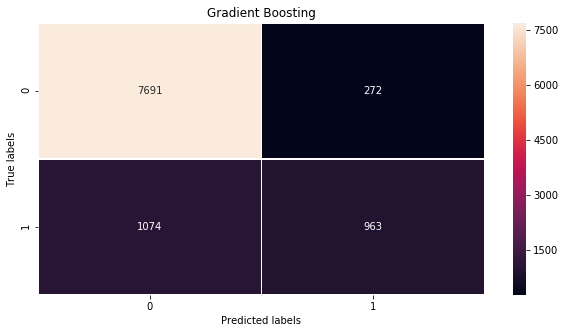

In [29]:
fig = plt.figure(figsize = (10,5))
cm = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))
ax = sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g', linewidths=.5)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
    
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Gradient Boosting')

Text(0.5, 1, 'SVM')

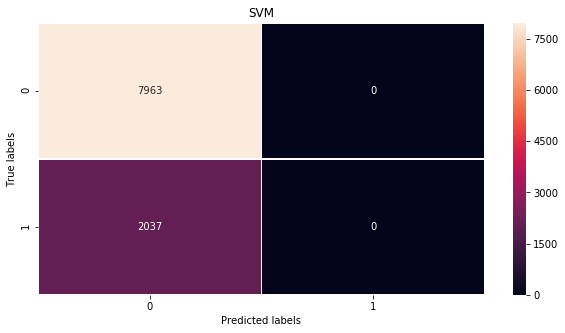

In [30]:
fig = plt.figure(figsize = (10,5))
cm = metrics.confusion_matrix(y, stratified_cv(X, y, svm.SVC, gamma='scale'))
ax = sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g', linewidths=.5)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
    
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('SVM')

Text(0.5, 1, 'Random Forest')

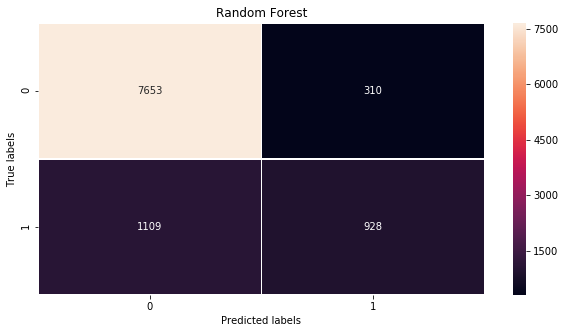

In [31]:
fig = plt.figure(figsize = (10,5))
cm = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.RandomForestClassifier, n_estimators=20))
ax = sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g', linewidths=.5)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
    
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Random Forest')

Text(0.5, 1, 'KNN')

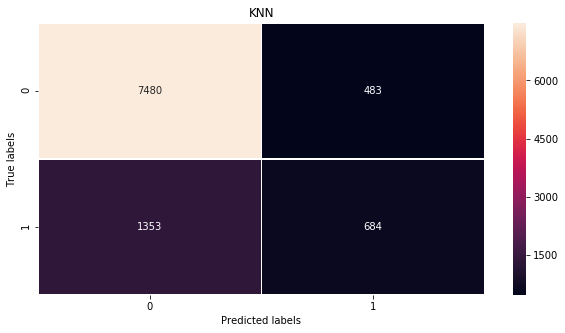

In [32]:
fig = plt.figure(figsize = (10,5))
cm = metrics.confusion_matrix(y, stratified_cv(X, y, neighbors.KNeighborsClassifier, n_jobs=-1))
ax = sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g', linewidths=.5)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
    
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('KNN')

Text(0.5, 1, 'Logistic Regression')

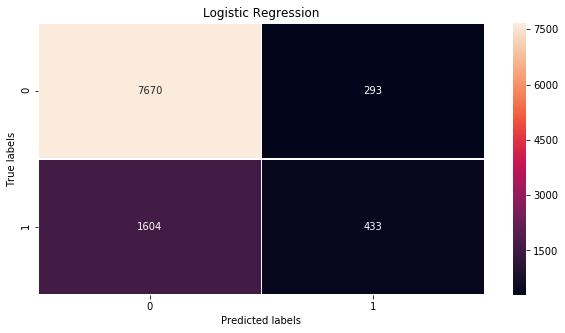

In [33]:
fig = plt.figure(figsize = (10,5))
cm = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.LogisticRegression, solver='lbfgs', max_iter=1000))
ax = sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g', linewidths=.5)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
    
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression')

In [34]:
print('Gradient Boosting Classifier:\n {}\n'
      .format(metrics.classification_report(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):\n {}\n'
      .format(metrics.classification_report(y, stratified_cv(X, y, svm.SVC, gamma='scale'))))
print('Random Forest Classifier:\n {}\n'
      .format(metrics.classification_report(y, stratified_cv(X, y, ensemble.RandomForestClassifier, n_estimators=20))))
print('K Nearest Neighbor Classifier:\n {}\n'
      .format(metrics.classification_report(y, stratified_cv(X, y, neighbors.KNeighborsClassifier, n_jobs=-1))))
print('Logistic Regression:\n {}\n'
      .format(metrics.classification_report(y, stratified_cv(X, y, linear_model.LogisticRegression, solver='lbfgs', max_iter=1000))))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      7963
           1       0.77      0.47      0.58      2037

    accuracy                           0.86     10000
   macro avg       0.82      0.72      0.75     10000
weighted avg       0.86      0.86      0.85     10000




C:\Users\talentiluca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Support vector machine(SVM):
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      7963
           1       0.00      0.00      0.00      2037

    accuracy                           0.80     10000
   macro avg       0.40      0.50      0.44     10000
weighted avg       0.63      0.80      0.71     10000


Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      7963
           1       0.74      0.45      0.56      2037

    accuracy                           0.86     10000
   macro avg       0.81      0.71      0.74     10000
weighted avg       0.85      0.86      0.84     10000


K Nearest Neighbor Classifier:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      7963
           1       0.59      0.33      0.43      2037

    accuracy                           0.82     10000
   macro avg       0.72      0.64    

### 4.9 GridSearch in the Random Forest Model

In [35]:
y = data_new['exited']
X = data_new.drop('exited', 1)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=7)

param_grid = {
    'max_features': [1, 2, 4, 5],
    'n_estimators': [10, 20, 100, 500, 1000]
}
grid = GridSearchCV(ensemble.RandomForestClassifier(random_state=7),  
                    param_grid, n_jobs=-1, cv=5, return_train_score=True).fit(X_train, y_train) # increase CV takes too time

Text(0.5, 1, 'Grid search $R^2$')

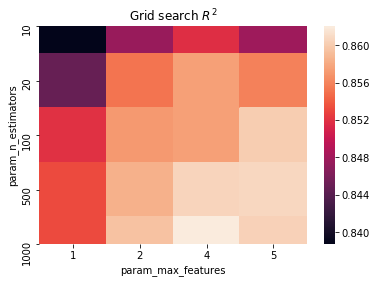

In [37]:
scores = pd.DataFrame(grid.cv_results_)[["mean_test_score","param_max_features","param_n_estimators"]]
ax = sns.heatmap(scores.pivot('param_n_estimators', 'param_max_features', 'mean_test_score'))
ax.set_title('Grid search $R^2$')

In [38]:
rf = ensemble.RandomForestClassifier(n_estimators=1000, max_features=4)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.23765981, 0.08060353, 0.13170144, 0.01882799, 0.04212166,
       0.14187962, 0.14066226, 0.14372701, 0.01089029, 0.0212881 ,
       0.01017192, 0.01036821, 0.01009816])

In [39]:
rf.score(X_train, y_train)

1.0

In [53]:
y_pred=rf.predict(X_test)

In [54]:
rf.score(X_test, y_test)

0.864

In [55]:
metrics.accuracy_score(y_test, y_pred)

0.864

In [56]:
metrics.roc_auc_score(y_test, y_pred)

0.7214088954016282

Text(69.0, 0.5, 'True labels')

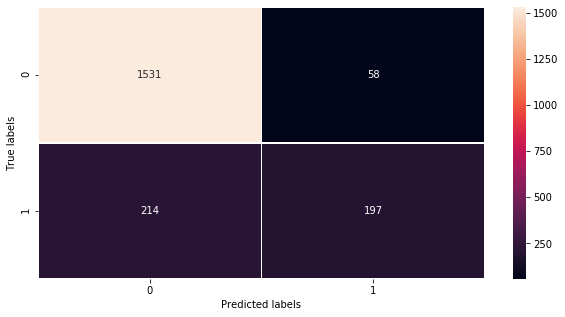

In [58]:
fig = plt.figure(figsize = (10,5))
cm = metrics.confusion_matrix(y_test, y_pred)
ax = sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g', linewidths=.5)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
    
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

Text(0.5, 0, 'Feature importance')

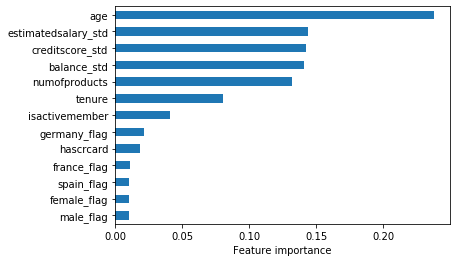

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = ensemble.RandomForestClassifier(n_estimators=1000, max_features=4)
rf.fit(X_train, y_train)

feature_importance = pd.Series(rf.feature_importances_, X_train.columns)
ax = feature_importance.sort_values().plot(kind='barh')
ax.set_xlabel('Feature importance')

In [44]:
clf = (
    ensemble.RandomForestClassifier(n_estimators=100, max_features=2)
    .fit(X_test, y_test)
)

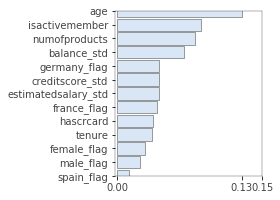

In [45]:
import rfpimp

fig, ax = plt.subplots(figsize=(8, 5))

imp = rfpimp.importances(clf, X_test, y_test)
viz = rfpimp.plot_importances(imp)
viz.view()

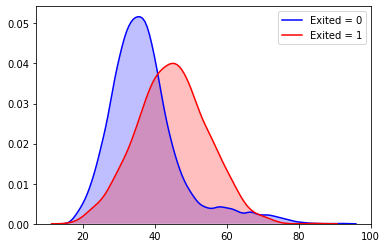

In [46]:
sns.kdeplot(data['age'][data['exited'] == 0], shade=1, color='blue', label='Exited = 0')
sns.kdeplot(data['age'][data['exited'] == 1], shade=1, color='red', label='Exited = 1'); 

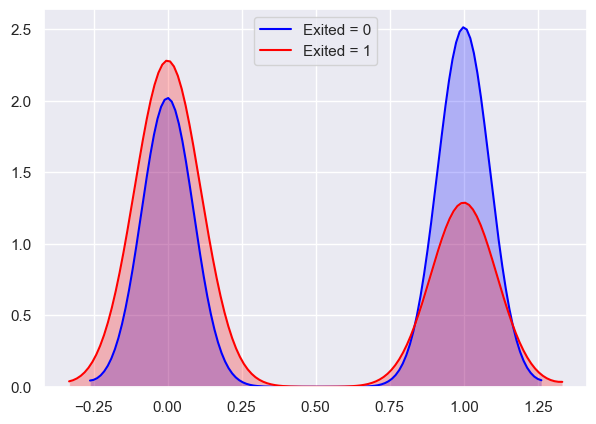

In [123]:
sns.kdeplot(data['isactivemember'][data['exited'] == 0], shade=1, color='blue', label='Exited = 0')
sns.kdeplot(data['isactivemember'][data['exited'] == 1], shade=1, color='red', label='Exited = 1');

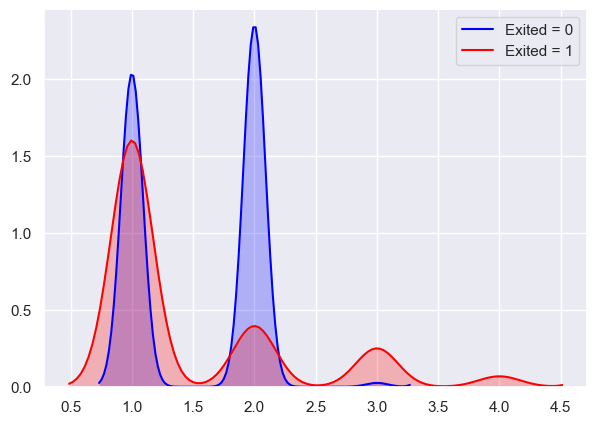

In [122]:
sns.kdeplot(data['numofproducts'][data['exited'] == 0], shade=1, color='blue', label='Exited = 0')
sns.kdeplot(data['numofproducts'][data['exited'] == 1], shade=1, color='red', label='Exited = 1');

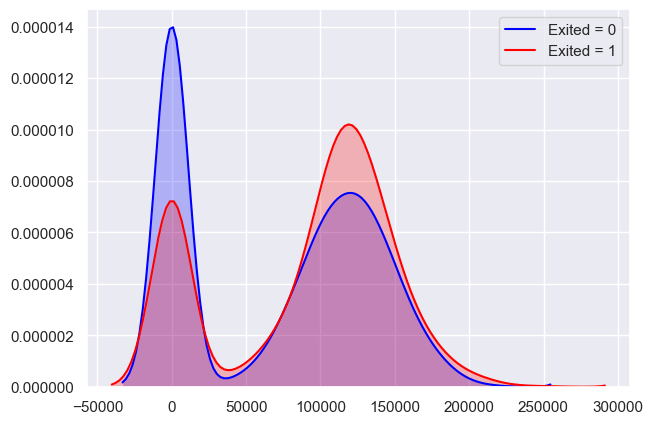

In [125]:
sns.kdeplot(data['balance'][data['exited'] == 0], shade=1, color='blue', label='Exited = 0')
sns.kdeplot(data['balance'][data['exited'] == 1], shade=1, color='red', label='Exited = 1');

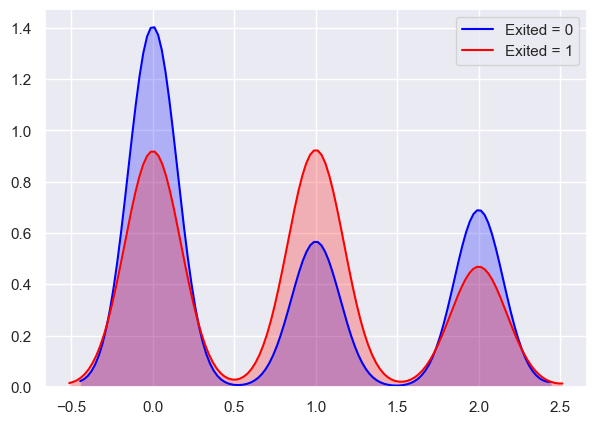

In [278]:
sns.kdeplot(data['geography'][data['exited'] == 0], shade=1, color='blue', label='Exited = 0')
sns.kdeplot(data['geography'][data['exited'] == 1], shade=1, color='red', label='Exited = 1');

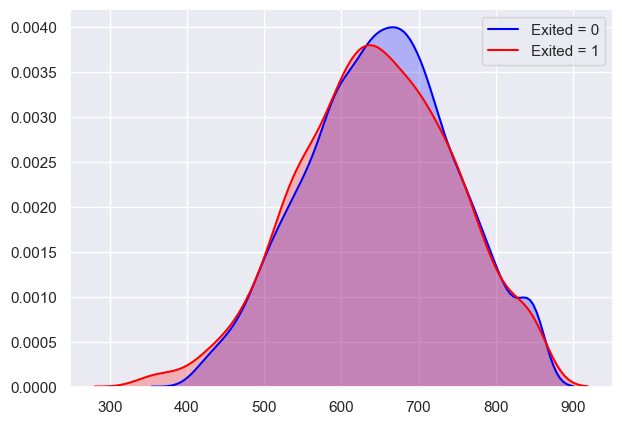

In [279]:
sns.kdeplot(data['creditscore'][data['exited'] == 0], shade=1, color='blue', label='Exited = 0')
sns.kdeplot(data['creditscore'][data['exited'] == 1], shade=1, color='red', label='Exited = 1');

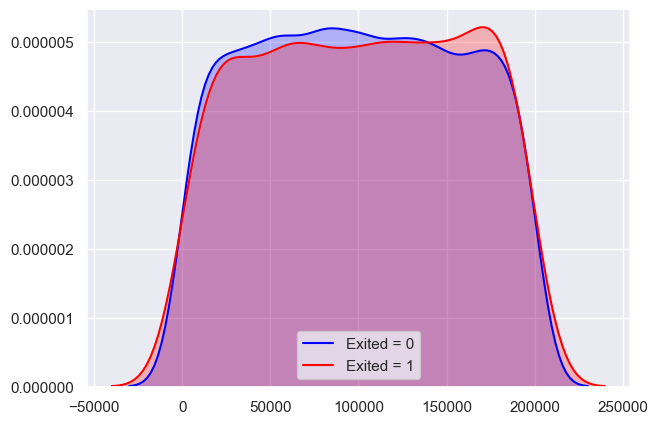

In [182]:
sns.kdeplot(data['estimatedsalary'][data['exited'] == 0], shade=1, color='blue', label='Exited = 0')
sns.kdeplot(data['estimatedsalary'][data['exited'] == 1], shade=1, color='red', label='Exited = 1');